In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth',
          'Species']
df = pd.read_csv('iris_data.txt', header = None, names = columns)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.shape

(150, 5)

In [11]:
df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object

In [12]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [13]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [22]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


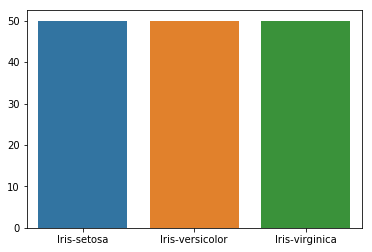

In [21]:
types = df['Species'].value_counts().index
value = df['Species'].value_counts().values
sns.barplot(x = types, y = value, data = df)

In [26]:
corr = df.corr()

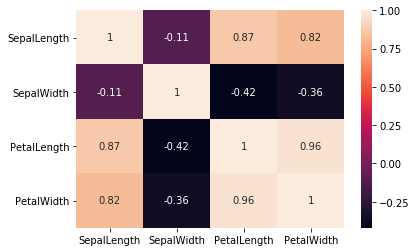

In [30]:
sns.heatmap(corr, annot = True)

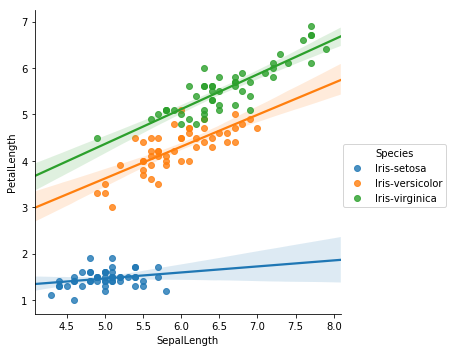

In [31]:
sns.lmplot(x = 'SepalLength', y = 'PetalLength', data = df, hue = 'Species')

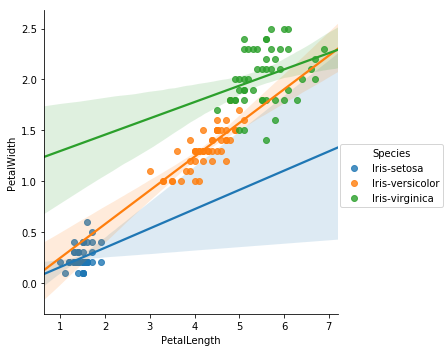

In [33]:
sns.lmplot(x = 'PetalLength', y = 'PetalWidth',data = df, hue = 'Species')

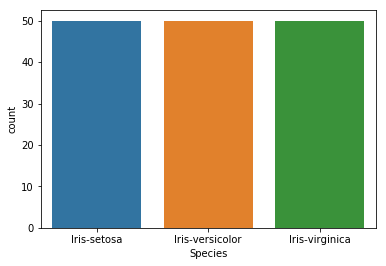

In [34]:
sns.countplot(x = 'Species', data = df)

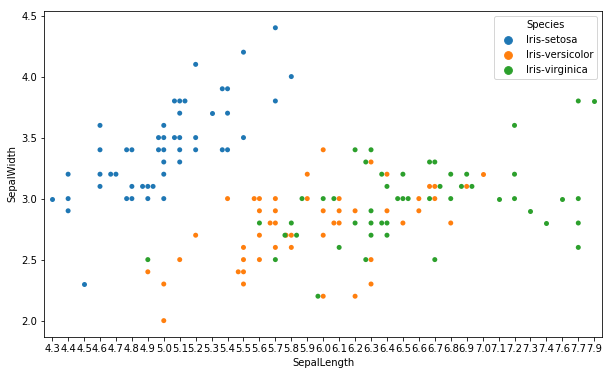

In [42]:
#swarmplot
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'SepalLength', y = 'SepalWidth', data = df, hue = 'Species')


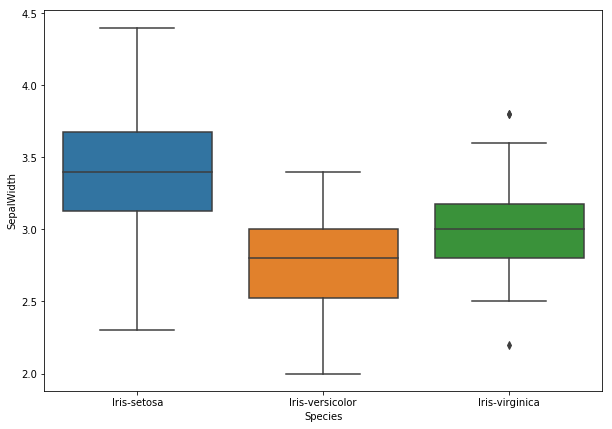

In [45]:
plt.figure(figsize =(10,7) )
sns.boxplot(x = 'Species', y = 'SepalWidth', data = df)

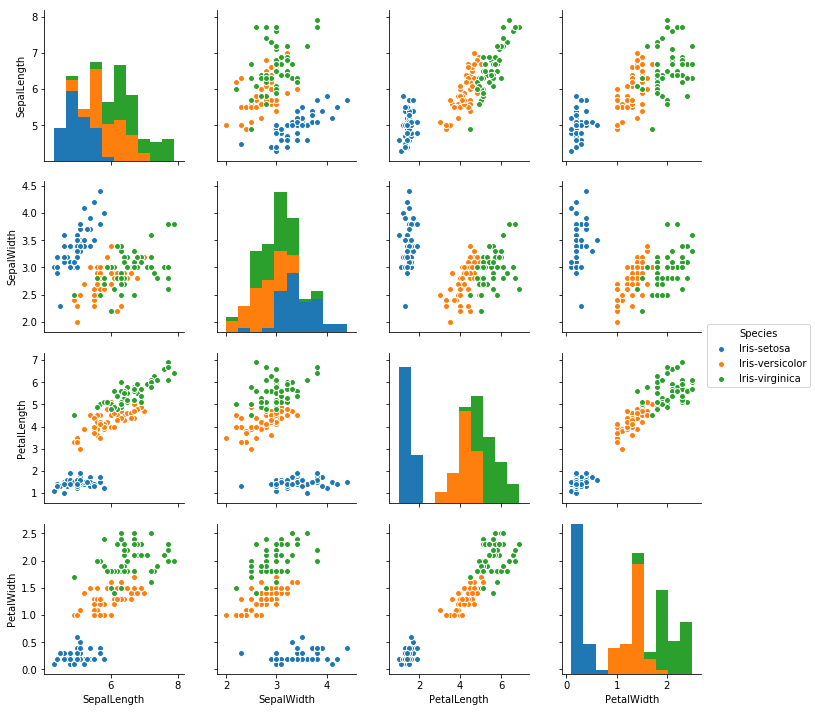

In [47]:
sns.pairplot(df, hue = 'Species')

In [49]:
#loading machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [54]:
X = np.array(df.iloc[:,0:4])
y = np.array(df['Species'])

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [68]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [69]:
knn.score(X_test,y_test)

0.98

## Performing Cross Validation

In [79]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
for i in range(1,51,2):
    neighbors.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn,X_train,y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    

In [66]:
#Misclassification error
MSE = [1-x for x in cv_scores]
optimal_k= neighbors[MSE.index(min(MSE))]
optimal_k

7

Text(0,0.5,'Misclassification Error Rate')

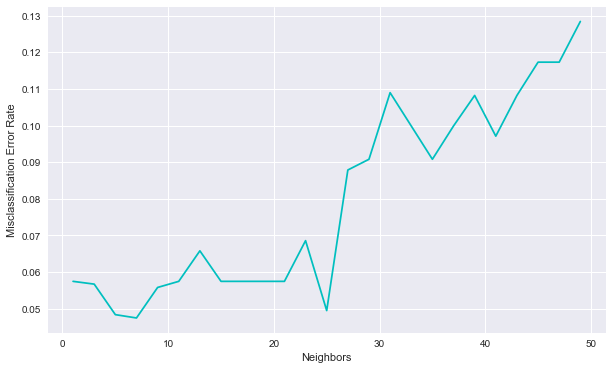

In [78]:
sns.set()
plt.figure(figsize = (10,6))
plt.plot(neighbors,MSE, 'c')
plt.xlabel('Neighbors')
plt.ylabel('Misclassification Error Rate')
